<a href="https://colab.research.google.com/github/rahulcheeti/machine-learning/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

for i in range(5):
  x_val = np.array(x_train[i*10000:(i+1)*10000])
  y_val = np.array(y_train[i*10000:(i+1)*10000])
  
  x_tra = np.array(x_train[0:i*10000]+x_train[(i+1)*10000:50000])
  y_tra = np.array(y_train[0:i*10000]+y_train[(i+1)*10000:50000])
  
  
  
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_tra.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

  History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))
  score = model.evaluate(x_val, y_val, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print(score)
  print(History.history)

  plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(('Train Accuracy','Test Accuracy'))
  plt.show(plotaccuracy)
  
  val_loss.append(History.history['val_loss'][-1])
  val_acc.append(History.history['val_acc'][-1])

avg_val_loss = 0
avg_val_acc = 0
for i in range(5):
  avg_val_loss += val_loss[i]/5
  avg_val_acc += val_acc[i]/5
  
print('avgerage validation loss:',avg_val_loss)
print('average validation accuracy:',avg_val_acc)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


NameError: ignored

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

for i in range(5):
  x_val = np.array(x_train[i*10000:(i+1)*10000])
  y_val = np.array(y_train[i*10000:(i+1)*10000])
  
  x_tra = np.array(x_train[0:i*10000]+x_train[(i+1)*10000:50000])
  y_tra = np.array(y_train[0:i*10000]+y_train[(i+1)*10000:50000])
  
  
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
 
  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

  History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))
  score = model.evaluate(x_val, y_val, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print(score)
  print(History.history)

  plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(('Train Accuracy','Test Accuracy'))
  plt.show(plotaccuracy)
  
  val_loss.append(History.history['val_loss'][-1])
  val_acc.append(History.history['val_acc'][-1])

avg_val_loss = 0
avg_val_acc = 0
for i in range(5):
  avg_val_loss += val_loss[i]/5
  avg_val_acc += val_acc[i]/5
  
print('avgerage validation loss:',avg_val_loss)
print('average validation accuracy:',avg_val_acc)


## First Architecture Training and Validation set

Using TensorFlow backend.


170500096/170498071 [==============================] - 53s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 24s 605us/step - loss: 1.8939 - acc: 0.2875
Epoch 1/1
40000/40000 [==============================] - 20s 501us/step - loss: 1.5866 - acc: 0.4158
Epoch 1/1
40000/40000 [==============================] - 24s 594us/step - loss: 1.4540 - acc: 0.4702
Epoch 1/1
40000/40000 [==============================] - 19s 486us/step - loss: 1.3653 - acc: 0.5058
Epoch 1/1
40000/40000 [==============================] - 20s 495us/step - loss: 1.2952 - acc: 0.5350
Epoch 1/1
40000/40000 [==============================] - 24s 593us/step - loss: 1.2443 - acc: 0.5556
Epoch 1/1
40000/40

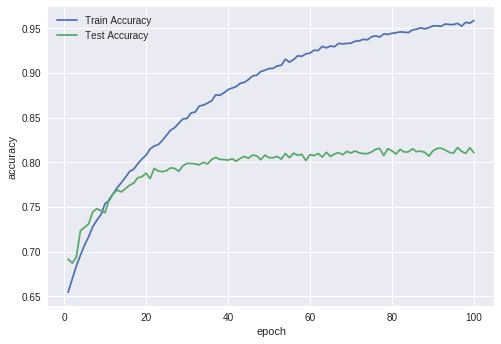

validation loss: 0.768152096414566
validation accuracy: 0.8106


In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

x_val = np.array(x_train[4*10000:(4+1)*10000])
y_val = np.array(y_train[4*10000:(4+1)*10000])
  
x_tra = np.array(x_train[0:4*10000]+x_train[(4+1)*10000:50000])
y_tra = np.array(y_train[0:4*10000]+y_train[(4+1)*10000:50000])
  
  
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_tra)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_tra, y_tra, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])

## Second Architecture Training and Validation set

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Epoch 1/1
40000/40000 [==============================] - 17s 420us/step - loss: 1.8855 - acc: 0.3043
Epoch 1/1
40000/40000 [==============================] - 16s 398us/step - loss: 1.5958 - acc: 0.4142
Epoch 1/1
40000/40000 [==============================] - 16s 395us/step - loss: 1.4893 - acc: 0.4567
Epoch 1/1
40000/40000 [==============================] - 16s 395us/step - loss: 1.4152 - acc: 0.4924
Epoch 1/1
40000/40000 [==============================] - 16s 401us/step - loss: 1.3536 - acc: 0.5155
Epoch 1/1
40000/40000 [==============================] - 16s 390us/step - loss: 1.2935 - acc: 0.5368
Epoch 1/1
40000/40000 [==============================] - 16s 400us/step - loss: 1.2447 - acc: 0.5569
Epoch 1/1
40000/40000 [==============================] - 16s 389us/step - loss: 1.2116 - acc: 0.5689
Epoch 1/1
40000/40000 [==============================] - 16s 399us/step - loss: 1.1667 - acc: 0.5860
Epoch 1/1
40000/40

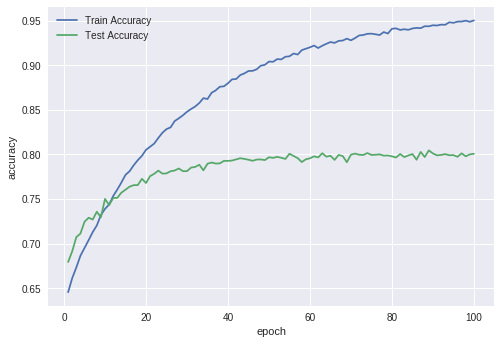

validation loss: 0.7711876882076263
validation accuracy: 0.8007


In [14]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

x_val = np.array(x_train[4*10000:(4+1)*10000])
y_val = np.array(y_train[4*10000:(4+1)*10000])
  
x_tra = np.array(x_train[0:4*10000]+x_train[(4+1)*10000:50000])
y_tra = np.array(y_train[0:4*10000]+y_train[(4+1)*10000:50000])
  
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_tra.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_tra)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_tra, y_tra, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])


## Third Architecture Training and Validation set

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Epoch 1/1
40000/40000 [==============================] - 11s 286us/step - loss: 1.8618 - acc: 0.3263
Epoch 1/1
40000/40000 [==============================] - 11s 276us/step - loss: 1.6201 - acc: 0.4099
Epoch 1/1
40000/40000 [==============================] - 11s 268us/step - loss: 1.5348 - acc: 0.4429
Epoch 1/1
40000/40000 [==============================] - 11s 268us/step - loss: 1.4765 - acc: 0.4663
Epoch 1/1
40000/40000 [==============================] - 11s 268us/step - loss: 1.4343 - acc: 0.4805
Epoch 1/1
40000/40000 [==============================] - 11s 269us/step - loss: 1.4077 - acc: 0.4938
Epoch 1/1
40000/40000 [==============================] - 11s 275us/step - loss: 1.3752 - acc: 0.5055
Epoch 1/1
40000/40000 [==============================] - 11s 268us/step - loss: 1.3447 - acc: 0.5182
Epoch 1/1
40000/40000 [==============================] - 11s 270us/step - loss: 1.3213 - acc: 0.5284
Epoch 1/1
40000/40

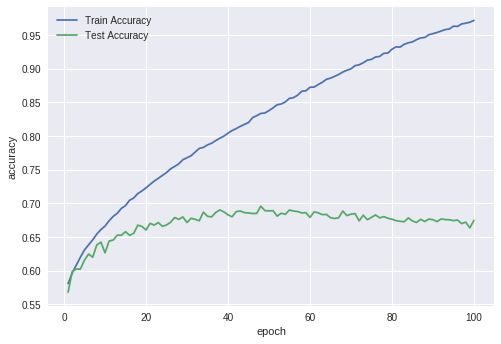

validation loss: 1.7077101719856262
validation accuracy: 0.6749


In [5]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

x_val = np.array(x_train[4*10000:(4+1)*10000])
y_val = np.array(y_train[4*10000:(4+1)*10000])
  
x_tra = np.array(x_train[0:4*10000]+x_train[(4+1)*10000:50000])
y_tra = np.array(y_train[0:4*10000]+y_train[(4+1)*10000:50000])
  
model = keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_tra.shape[1:]))
model.add(AveragePooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))
   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_tra)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_tra, y_tra, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])

## Fourth Architecture Training and Validation set

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Epoch 1/1
40000/40000 [==============================] - 18s 458us/step - loss: 1.9756 - acc: 0.2536
Epoch 1/1
40000/40000 [==============================] - 17s 434us/step - loss: 1.6698 - acc: 0.3781
Epoch 1/1
40000/40000 [==============================] - 18s 440us/step - loss: 1.5551 - acc: 0.4241
Epoch 1/1
40000/40000 [==============================] - 17s 436us/step - loss: 1.4763 - acc: 0.4566
Epoch 1/1
40000/40000 [==============================] - 17s 434us/step - loss: 1.4206 - acc: 0.4804
Epoch 1/1
40000/40000 [==============================] - 17s 433us/step - loss: 1.3715 - acc: 0.5010
Epoch 1/1
40000/40000 [==============================] - 17s 429us/step - loss: 1.3262 - acc: 0.5193
Epoch 1/1
40000/40000 [==============================] - 18s 439us/step - loss: 1.2833 - acc: 0.5367
Epoch 1/1
40000/40000 [==============================] - 18s 440us/step - loss: 1.2414 - acc: 0.5525
Epoch 1/1
40000/40

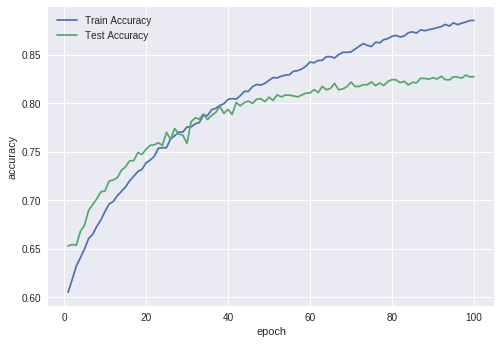

validation loss: 0.5175829311609268
validation accuracy: 0.8274


In [6]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

x_val = np.array(x_train[4*10000:(4+1)*10000])
y_val = np.array(y_train[4*10000:(4+1)*10000])
  
x_tra = np.array(x_train[0:4*10000]+x_train[(4+1)*10000:50000])
y_tra = np.array(y_train[0:4*10000]+y_train[(4+1)*10000:50000])
  
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_tra.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_tra)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_tra, y_tra, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])


## Best Architecture (Architecture Four) Training and Test set

In [8]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

  
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_tra.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=50000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

History = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('Test loss:',History.history['val_loss'][-1])
print('Test accuracy:',History.history['val_acc'][-1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Epoch 1/1
50000/50000 [==============================] - 23s 464us/step - loss: 1.9092 - acc: 0.2736
Epoch 1/1
50000/50000 [==============================] - 22s 446us/step - loss: 1.6202 - acc: 0.3970
Epoch 1/1
50000/50000 [==============================] - 22s 444us/step - loss: 1.5132 - acc: 0.4452


KeyboardInterrupt: ignored